<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/solutions/Workshop_Regression_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt

## Data 

$\mathbf{X}$ is a feature matrix corresponding to $n$ training examples, each represented with $d$ features and has shape $d \times n$.  
\begin{equation}
  \mathbf{X}_{d \times n} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} & 
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

* here each $\mathbf{x}_i \in \mathbb{R}^d$

*  $\mathbf{y}$ is a label vector of shape $n \times 1$.  
\begin{equation}
    \mathbf{y} = \begin{bmatrix}
        y_{1}  \\
        y_{2} \\
        \vdots  \\
        y_{n} \\
      \end{bmatrix}
\end{equation}

*  The $i$-th entry in this vector, $\mathbf{y}[i]$ gives label for $i$-th example, which is denoted by $y_{i} \in \mathbb{R}$.

### Training data

In [67]:
## Training Data 
rng = np.random.default_rng(seed = 101)
X_train = (np.arange(-2, 2, 0.01).reshape(1, -1))
y_train = (2*X_train**3+3*X_train**2 +4 + rng.normal(0, 1, X_train.shape[1]).reshape(1, -1)).T
X_train.shape

(1, 400)

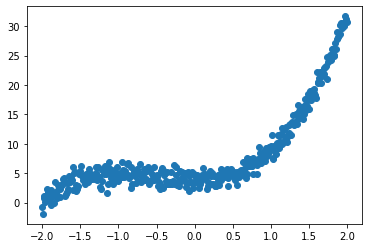

In [68]:
plt.scatter(X_train, y_train)

### Test data

In [69]:
### Test data
rng = np.random.default_rng(seed = 102)
X_test = np.arange(-2, 2, 0.02).reshape(1, -1)
y_test = (2*X_test**3+3*X_test**2 +4 + rng.normal(0, 2, X_test.shape[1]).reshape(1, -1)).T

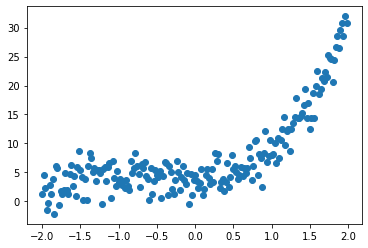

In [70]:
plt.scatter(X_test, y_test)

## Model

Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbf{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature of the data point $\mathbf{x}$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is 

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbf{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbf{X}$ is of shape $(d+1, n)$ where the first row of $\mathbf{X}$ has entries as 1.


### Add dummy feature

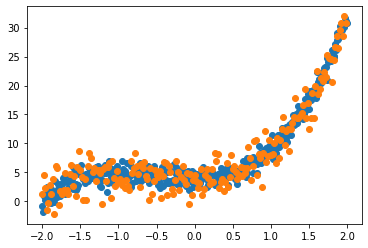

In [71]:
dummy_feature = np.ones(X_train.shape[1])
X = np.row_stack([dummy_feature,X_train])
X_t = np.row_stack([np.ones(X_test.shape[1]), X_test])
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

## Loss function

The total loss is the sum of square of errors between actual and predicted labels for each training point.  

The error for $i$-th training point is calculated as follows:
\begin{eqnarray}
e^{(i)} &=& (\mathrm{{actual\ label} - {predicted\ label}})^2 \\
        &=& \left ({y_{i}} -
        {h_{\mathbf{w}}(\mathbf{x}_{i})} \right)^2 \\
        &=& \left ({y_{i}} -
        {\mathbf{w}^T \mathbf{x}_{i}} \right)^2
\end{eqnarray}

 

The total loss $L(\mathbf{w})$ is sum of errors at each training point:
\begin{equation}
L(\mathbf{w}) = \sum_{i=1}^{n} e^{(i)} 
\end{equation}

We divide this by $\frac{1}{2}$ for mathematical convenience in later use:


\begin{eqnarray}
  L(\mathbf{w}) &=& \frac{1}{2} \sum_{i=1}^{n} e^{(i)} \\ &=&  \frac{1}{2} \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right)^T \left({{\mathbf{X}^T \mathbf{w}}} - \mathbf{y} \right)) 
\end{eqnarray}


## Optimization



#### 1. Normal equation

Let's set $\dfrac{\partial L(\mathbf{w})}{\partial \mathbf{w}}$ to 0 and solve for $\mathbf{w}$:
\begin{eqnarray}
\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}} &=& \mathbf{X} \mathbf{X}^T \mathbf{w} - \mathbf{X} \mathbf{y} = 0 \\
\mathbf{X}^T \mathbf{X} \mathbf{w} &=& \mathbf{X}^T \mathbf{Y} \\
\mathbf{w} &=& \left( \mathbf{X} \mathbf{X}^T \right)^{-1} \mathbf{X} \mathbf{y}
\end{eqnarray}



#### Find weight vector and prediction for training and test dataset

In [72]:
### weight 
def weights(X,y):
  return np.linalg.pinv((X@X.T))@X@y

w = weights(X, y_train)
w

array([[7.93982825],
       [4.79910241]])

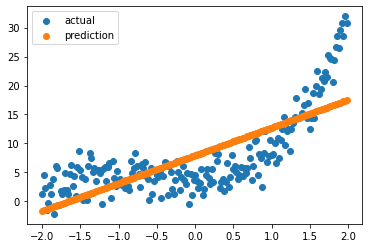

In [73]:
### Prediction
def predict(X, w):
  return X.T@w

prediction = predict(X_t, w)
plt.scatter(X_test, y_test, label="actual")
plt.scatter(X_test, prediction, label="prediction")
plt.legend();

### Plot weight vector

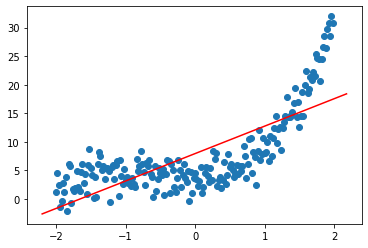

In [74]:
### Plot weight vector
plt.scatter(X_test, y_test, label="actual")
ax = plt.gca();
xvals =  np.array(ax.get_xlim())
yvals = w[0] + w[1]*xvals
plt.plot(xvals, yvals, 'red');

## Evaluation 

##### RMSE $$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$



In [75]:
### Training error and test error
def loss(y_test, prediction):
  return np.sqrt(np.mean((y_test - prediction)**2))

error = loss(y_test, prediction)
error

4.718639896481515

#### 2. Gradient Descent


Gradient of a function $f$ at a point $x$ gives the direction of maximum change in $f$ at the point $x$.

---

We start at a random point $\mathbf{w}$ at the loss function $L(\mathbf{w})$.


We basically need an update rule in gradient descent, which is as follows:

\begin{eqnarray}
\mathbf{w}_{k+1} &:=& \mathbf{w}_k - \alpha{\frac{\partial L(\mathbf{w})}{\partial \mathbf{w}}} \\
   &:=& \mathbf{w}_k - \alpha{\left(\mathbf{X} \mathbf{X}^T \mathbf{w}_{k} - \mathbf{X} \mathbf{y}\right)} \\
\end{eqnarray}

Note that this is the vectorized implementation.  It will make sure that all the parameters are updated in one go through this.


In [76]:
X.shape

(2, 400)

In [98]:
### Gradient descent
def gradient(X, y, w):
  return (X@X.T)@w-(X@y)

def gradient_decent(x,y,learning_rate = 1, iteration = 20):
  w = np.zeros(x.shape[0]).reshape(-1,1)
  for i in range(iteration):
    w = w-learning_rate*(gradient(x,y,w))
  return w

w_g = gradient_decent(X, y_train, 0.001, 20)
print(w)

y_hat = predict(X, w_g)
error = loss(y_train, y_hat)
print("error", error)

[[7.93982825]
 [4.79910241]]
error 4.4770020114031635


### Number of iterations vs loss (for fixed alpha)

Text(0.5, 1.0, 'Gradient decent loss')

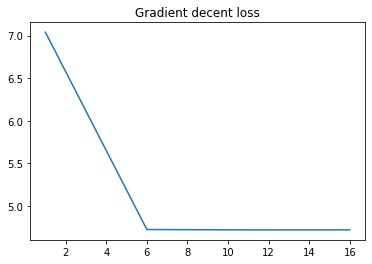

In [104]:
### Plot nunber of iterations vs loss
iterations = np.arange(1, 20, 5)
error = np.array([])
for i in iterations:
  w_gg = gradient_decent(X, y_train, 0.001, i)
  y_hat = predict(X_t, w_gg)
  error_loss = loss(y_test, y_hat)
  # print(i,w_gg, error_loss)
  error = np.append(error, error_loss)

# print(error)
plt.plot(iterations, error);
plt.title("Gradient decent loss")

###9 SGD:



In [91]:
### SGD
X.shape

(2, 400)

In [101]:
def sgd(X, y, learning_rate, iterations, size_r=5):
  w0 = np.zeros(X.shape[0]).reshape(-1, 1)
  for i in range(iterations):
    rng = np.random.default_rng(seed = i)
    indices = rng.integers(X.shape[1], size=X.shape[1]//size_r)
    X1, y1 = X[:, indices], y[indices]
    # print(X1.shape, y1.shape, w0.shape)
    w0 = w0-learning_rate*(gradient(X1, y1, w0)) 
  return w0


w_sgd = sgd(X, y_train, 0.001, 20)
w_sgd

array([[6.57485809],
       [4.57749801]])

Text(0.5, 1.0, 'SDG loss')

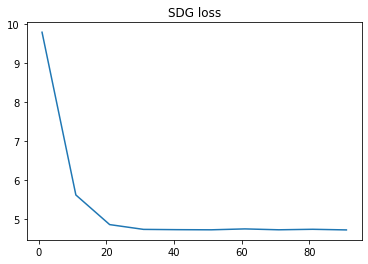

In [106]:
### Plot nunber of iterations vs loss
iterations = np.arange(1, 100, 10)
error = np.array([])
for i in iterations:
  w_gg = sgd(X, y_train, 0.001, i)
  y_hat = predict(X_t, w_gg)
  error_loss = loss(y_test, y_hat)
  # print(i,w_gg, error_loss)
  error = np.append(error, error_loss)

# print(error)
plt.plot(iterations, error);
plt.title("SDG loss")

## Kernel Regression



* The optimal weight vector can be written as linear combination of data points.

---

Let $\phi$ be the trainsformation mapping that trasforms the $d$-dimensional data points to $D$-dimension.

$$\phi: \mathbb{R}^d \rightarrow \mathbb{R}^D$$

Then

$$\mathbf{w} = \phi(\mathbf{X})\alpha$$

where,

* $\mathbf{X}$ = Feature matrix of shape $(d, n)$
* $\alpha = [\alpha_1, \alpha_2, ..., \alpha_n]^T \in \mathbb{R}^n$



Here 

$$\alpha = K^{-1}y$$

where,
\begin{equation}
 K_{n \times n} = \begin{bmatrix}
       k(\mathbf{x}_1,\mathbf{x}_1) & k(\mathbf{x}_1,\mathbf{x}_2) &\dots & k(\mathbf{x}_1,\mathbf{x}_n)\\
        k(\mathbf{x}_2,\mathbf{x}_1) & k(\mathbf{x}_2,\mathbf{x}_2) &\dots & k(\mathbf{x}_2,\mathbf{x}_n)\\
        \vdots & \vdots & \dots & \vdots\\
       k(\mathbf{x}_n,\mathbf{x}_1) & k(\mathbf{x}_n,\mathbf{x}_2) &\dots & k(\mathbf{x}_n,\mathbf{x}_n)\\
    \end{bmatrix}
\end{equation}

Here, $k$ is the kernel function

$$k: \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}\\ k(x_1, x_2) = \phi(x_1)^T\phi(x_2)
$$

In [108]:
### K matrix and coefficient

def polynomialKernal(X, p):
  return (X.T@X+1)**p

def coefficient(X, y, p):
  K = polynomialKernal(X, p)
  return np.linalg.pinv(K)@y



## Prediction

For a test point $\mathbf{x}_t$, prediction is given by

$$\sum\limits_{i=1}^{n}k(\mathbf{x}_i, \mathbf{x}_t)\alpha_i$$



#### Polynomial kernel of degree $p$:


$k(\mathbf{x}_1, \mathbf{x}_2) = (\mathbf{x}_1^T\mathbf{x}_2+1)^p$

In [ ]:
### Polynomial Kernel



#### For prediction

Let the training data matrix with $n$ examples is given by
 \begin{equation}
  \mathbf{X}_{train} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{1}&  
       \mathbf{x}_{2} & 
      \dots &
       \mathbf{x}_{n}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

and the test data matrix with $m$ examples is given by
 \begin{equation}
  \mathbf{X}_{test} = \begin{bmatrix}
       | & | &\dots & |\\
       \mathbf{x}_{t1}&  
       \mathbf{x}_{t2} & 
      \dots &
       \mathbf{x}_{tm}  \\
        | & | &\dots & |\\
    \end{bmatrix}
\end{equation}

----

Then 

\begin{equation}
  \mathbf{X}_{train}^T \mathbf{X}_{test}  = \begin{bmatrix}
       \mathbf{x}_1^T\mathbf{x}_{t1} &  \mathbf{x}_1^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_1^T\mathbf{x}_{tm} \\
      \mathbf{x}_2^T\mathbf{x}_{t1} &  \mathbf{x}_2^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_2^T\mathbf{x}_{tm} \\
        \vdots & \vdots &\dots & \vdots\\
         \mathbf{x}_n^T\mathbf{x}_{t1} &  \mathbf{x}_n^T\mathbf{x}_{t2}  &\dots &  \mathbf{x}_n^T\mathbf{x}_{tm} \\
    \end{bmatrix}
\end{equation}


In [115]:
### Prediction

def poly_predict(X_train, y, X_test, p):
  alpha = coefficient(X_train, y, p)
  K_matrix = (X_train.T@X_test + 1)**p
  return K_matrix.T@alpha

y_poly_hat = poly_predict(X, y_train, X_t, 3)
error_poly = loss(y_test, y_poly_hat)
print(error_poly)

2.110392110592152


### degree vs loss

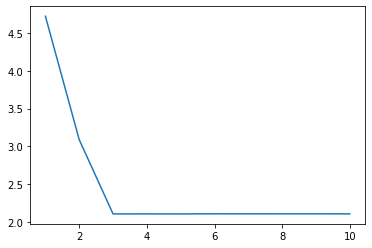

In [116]:
### Plot degree vs loss
degree = [1,2,3,4,5,6, 10]
errors_plys = []
for i in degree:
  y_poly_hat = poly_predict(X, y_train, X_t, i)
  error_poly = loss(y_test, y_poly_hat)
  errors_plys.append(error_poly)

plt.plot(degree, errors_plys)